In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("discounting_chain/data/discounting_chain_histories_array.pickle", "rb") as f:
    histories = pickle.load(f)

num_iterations = 1000
n_updates_per_iter = 50

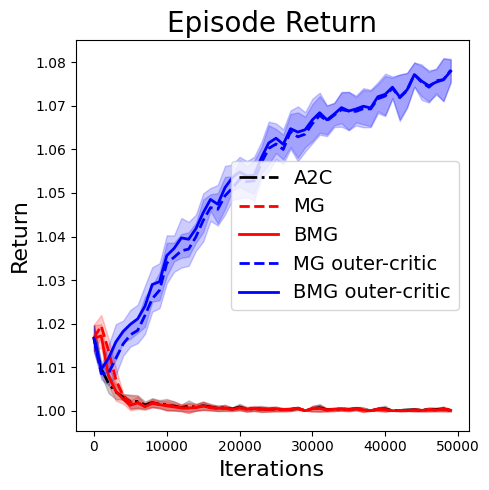

In [3]:
plt.figure(figsize=(5, 5))
metadata = [
    ("A2C", "black", "-."),
    ("MG", "red", "--"),
    ("BMG", "red", "-"),
    ("MG outer-critic", "blue", "--"),
    ("BMG outer-critic", "blue", "-"),
]
n_points_plotting = 50
n_logging_points = len(histories[0]["episode_return_mean"][0])
env_steps = num_iterations*n_updates_per_iter
n_iterations = np.linspace(0, env_steps, n_points_plotting, endpoint=False)
points = np.linspace(0, n_logging_points, n_points_plotting, dtype=int, endpoint=False)

for agent_history, (label, color, linestyle) in zip(histories, metadata):
    return_ = agent_history["episode_return_mean"][:, points]
    return_mean = return_.mean(axis=0)
    return_std = return_.std(axis=0)
    plt.plot(n_iterations, return_mean, label=label, c=color, linestyle=linestyle, linewidth=2)
    plt.fill_between(n_iterations, return_mean + return_std, return_mean - return_std, alpha=0.2, color=color)
plt.ylabel("Return", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.title("Episode Return", fontsize=20)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("plots/discounting_chain/dc_chain_return.png", dpi=300, bbox_inches="tight")

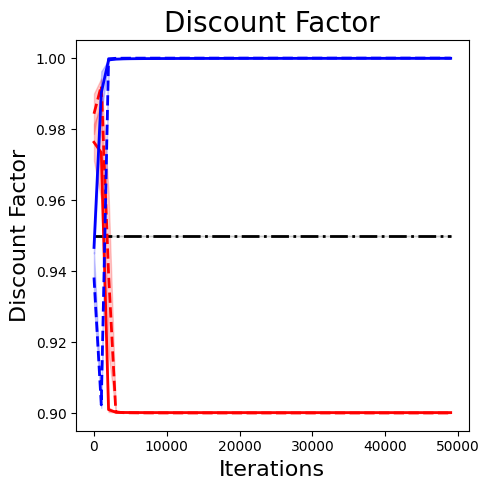

In [4]:
plt.figure(figsize=(5, 5))
metadata = [
    ("A2C", "black", "-."),
    ("MG", "red", "--"),
    ("BMG", "red", "-"),
    ("MG outer-critic", "blue", "--"),
    ("BMG outer-critic", "blue", "-"),
]
n_points_plotting = 50
n_logging_points = len(histories[0]["episode_return_mean"][0])
env_steps = num_iterations*n_updates_per_iter
n_iterations = np.linspace(0, env_steps, n_points_plotting, endpoint=False)
points = np.linspace(0, n_logging_points, n_points_plotting, dtype=int, endpoint=False)

for agent_history, (label, color, linestyle) in zip(histories, metadata):
    gamma = agent_history["discount_factor"][:, points]
    gamma_mean = gamma.mean(axis=0)
    gamma_std = gamma.std(axis=0)
    plt.plot(n_iterations, gamma_mean, label=label, c=color, linestyle=linestyle, linewidth=2)
    plt.fill_between(n_iterations, gamma_mean + gamma_std, gamma_mean - gamma_std, alpha=0.2, color=color)
plt.ylabel("Discount Factor", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.title("Discount Factor", fontsize=20)
plt.tight_layout()
plt.savefig("plots/discounting_chain/dc_chain_discount_factor.png", dpi=300, bbox_inches="tight")

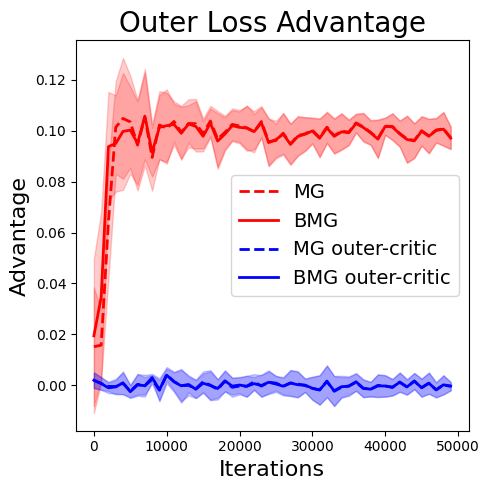

In [5]:
plt.figure(figsize=(5, 5))
metadata = [
    ("A2C", "black", "-."),
    ("MG", "red", "--"),
    ("BMG", "red", "-"),
    ("MG outer-critic", "blue", "--"),
    ("BMG outer-critic", "blue", "-"),
]
n_points_plotting = 50
n_logging_points = len(histories[0]["episode_return_mean"][0])
env_steps = num_iterations*n_updates_per_iter
n_iterations = np.linspace(0, env_steps, n_points_plotting, endpoint=False)
points = np.linspace(0, n_logging_points, n_points_plotting, dtype=int, endpoint=False)

for agent_history, (label, color, linestyle) in zip(histories, metadata):
    if label == "A2C":
        continue
    adv = agent_history["meta_advantages_step0"][:, points]
    adv_mean = adv.mean(axis=0)
    adv_std = adv.std(axis=0)
    plt.plot(n_iterations, adv_mean, label=label, c=color, linestyle=linestyle, linewidth=2)
    plt.fill_between(n_iterations, adv_mean + adv_std, adv_mean - adv_std, alpha=0.2, color=color)
plt.ylabel("Advantage", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.title("Outer Loss Advantage", fontsize=20)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("plots/discounting_chain/dc_chain_outer_loss_advantage.png", dpi=300, bbox_inches="tight")

## Appendix - advantage normalisation

In [6]:
with open("discounting_chain/data/discounting_chain_appendix_histories_array.pickle", "rb") as f:
    appendix_histories = pickle.load(f)

num_iterations = 1000
n_updates_per_iter = 50

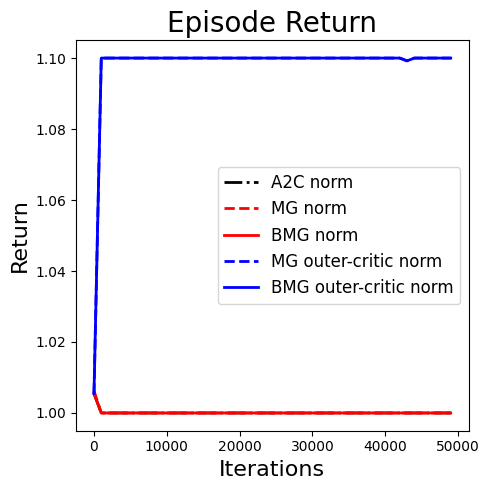

In [7]:
plt.figure(figsize=(5, 5))
metadata = [
    ("A2C norm", "black", "-."),
    ("MG norm", "red", "--"),
    ("BMG norm", "red", "-"),
    ("MG outer-critic norm", "blue", "--"),
    ("BMG outer-critic norm", "blue", "-"),
]
n_points_plotting = 50
n_logging_points = len(appendix_histories[0]["episode_return_mean"])
env_steps = num_iterations*n_updates_per_iter
n_iterations = np.linspace(0, env_steps, n_points_plotting, endpoint=False)
points = np.linspace(0, n_logging_points, n_points_plotting, dtype=int, endpoint=False)

for agent_history, (label, color, linestyle) in zip(appendix_histories, metadata):
    return_ = agent_history["episode_return_mean"][points]
    plt.plot(n_iterations, return_, label=label, c=color, linestyle=linestyle, linewidth=2)
plt.ylabel("Return", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.title("Episode Return", fontsize=20)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("plots/discounting_chain/dc_chain_return_appendix.png", dpi=300, bbox_inches="tight")

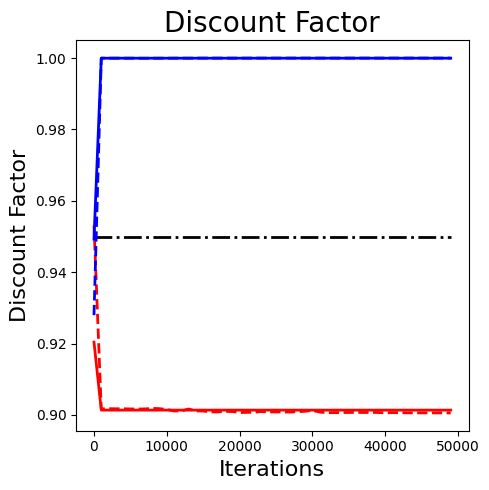

In [8]:
plt.figure(figsize=(5, 5))
metadata = [
    ("A2C", "black", "-."),
    ("MG", "red", "--"),
    ("BMG", "red", "-"),
    ("MG outer-critic", "blue", "--"),
    ("BMG outer-critic", "blue", "-"),
]
n_points_plotting = 50
n_logging_points = len(appendix_histories[0]["episode_return_mean"])
env_steps = num_iterations*n_updates_per_iter
n_iterations = np.linspace(0, env_steps, n_points_plotting, endpoint=False)
points = np.linspace(0, n_logging_points, n_points_plotting, dtype=int, endpoint=False)

for agent_history, (label, color, linestyle) in zip(appendix_histories, metadata):
    gamma = agent_history["discount_factor"][points]
    plt.plot(n_iterations, gamma, label=label, c=color, linestyle=linestyle, linewidth=2)
plt.ylabel("Discount Factor", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.title("Discount Factor", fontsize=20)
plt.tight_layout()
plt.savefig("plots/discounting_chain/dc_chain_discount_factor_appendix.png", dpi=300, bbox_inches="tight")

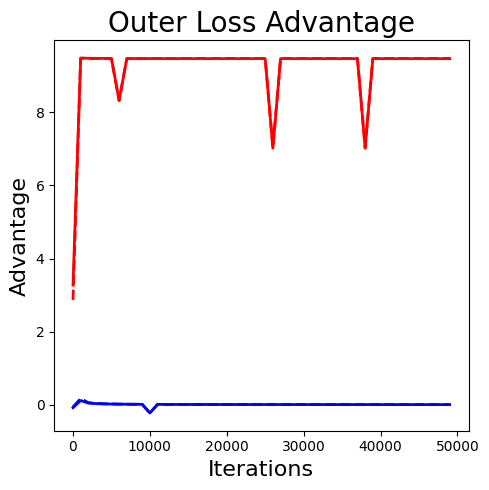

In [9]:
plt.figure(figsize=(5, 5))
metadata = [
    ("A2C", "black", "-."),
    ("MG", "red", "--"),
    ("BMG", "red", "-"),
    ("MG outer-critic", "blue", "--"),
    ("BMG outer-critic", "blue", "-"),
]
n_points_plotting = 50
n_logging_points = len(appendix_histories[0]["episode_return_mean"])
env_steps = num_iterations*n_updates_per_iter
n_iterations = np.linspace(0, env_steps, n_points_plotting, endpoint=False)
points = np.linspace(0, n_logging_points, n_points_plotting, dtype=int, endpoint=False)

for agent_history, (label, color, linestyle) in zip(appendix_histories, metadata):
    if label == "A2C":
        continue
    adv = agent_history["meta_advantages_step0"][points]
    plt.plot(n_iterations, adv, label=label, c=color, linestyle=linestyle, linewidth=2)
plt.ylabel("Advantage", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.title("Outer Loss Advantage", fontsize=20)
plt.tight_layout()
plt.savefig("plots/discounting_chain/dc_chain_outer_loss_advantage_appendix.png", dpi=300, bbox_inches="tight")